In [35]:
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

%matplotlib inline

Генерация выборки:

In [36]:
data = -np.log(1 - np.random.rand(25))
data

array([5.41945333, 0.55954187, 0.72107419, 0.25127378, 1.15771375,
       0.4267248 , 1.25204187, 0.14963384, 0.32425331, 1.66124706,
       3.0952598 , 0.31788528, 0.98319462, 1.57669841, 0.36527882,
       0.28243077, 0.67120742, 0.07959262, 0.44052839, 1.61173302,
       0.72107575, 1.64431241, 1.47224713, 0.91036951, 0.23908746])

2)мода, медиана, размах, оценка коэффицента ассиметрии

In [37]:
counts = np.unique(data, return_counts=True)[1]
mode = data[counts == counts.max()]
median = np.median(data)
range = np.ptp(data)
koef_assim = st.skew(data)
print(f"mode = {mode}\n median = {median} \n range = {range} \n koef_assim = {koef_assim}")

mode = [5.41945333 0.55954187 0.72107419 0.25127378 1.15771375 0.4267248
 1.25204187 0.14963384 0.32425331 1.66124706 3.0952598  0.31788528
 0.98319462 1.57669841 0.36527882 0.28243077 0.67120742 0.07959262
 0.44052839 1.61173302 0.72107575 1.64431241 1.47224713 0.91036951
 0.23908746]
 median = 0.7210741907032636 
 range = 5.339860715717111 
 koef_assim = 2.4907219395947338


3)Эмперическая функция распределения, гистограмма, boxplot

<bound method Figure.show of <Figure size 1200x400 with 3 Axes>>

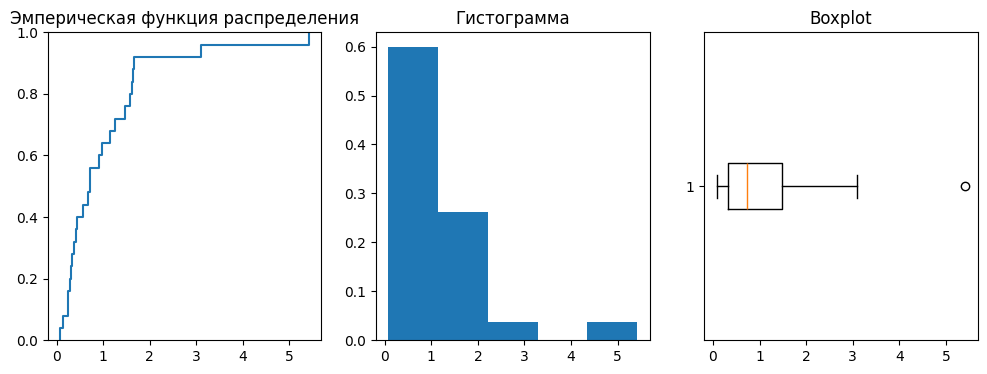

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].ecdf(data)
ax[0].set_title('Эмперическая функция распределения')

ax[1].hist(data, int(1 + np.log2(data.size)), density=True)
ax[1].set_title('Гистограмма')

ax[2].boxplot(data, vert = False)
ax[2].set_title('Boxplot')

fig.show

пункт С

Text(0, 0.5, 'плотность')

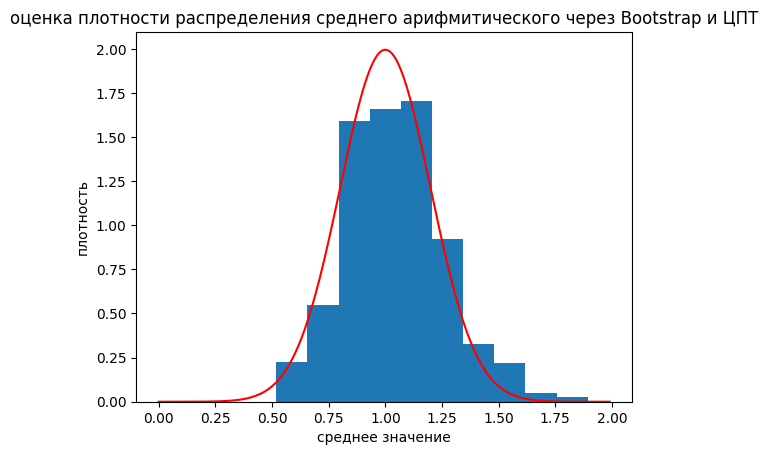

In [39]:
math_expectation = 1
dispersion = 1
bootstrap = st.bootstrap((data, ), np.mean, n_resamples=10**3).bootstrap_distribution

x = np.arange(0, 2, 0.01)
y = st.norm.pdf(x, math_expectation, (dispersion/data.size)**0.5)

fig, ax = plt.subplots()
ax.hist(bootstrap, density=True, label="bootstap")
ax.plot(x, y, label="ЦПТ", color = "r")

ax.set_title('оценка плотности распределения среднего арифмитического через Bootstrap и ЦПТ')
ax.set_xlabel('среднее значение')
ax.set_ylabel('плотность')

пункт Д

вероятность -  0.157


Text(0, 0.5, 'плоность')

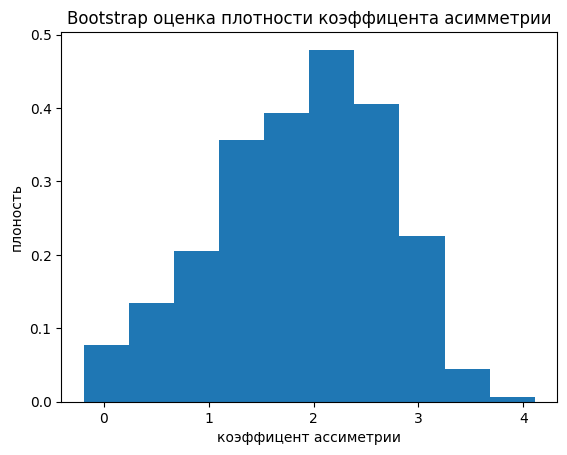

In [40]:
bootstrap = st.bootstrap((data, ), st.skew, n_resamples=1000).bootstrap_distribution
amount_points = np.count_nonzero(bootstrap < 1)
probability_estimation = amount_points / bootstrap.size
print("вероятность - ", probability_estimation)
fig, ax = plt.subplots()
ax.hist(bootstrap, density=True)
ax.set_title('Bootstrap оценка плотности коэффицента асимметрии')
ax.set_xlabel('коэффицент ассиметрии')
ax.set_ylabel('плоность')

пункт Е

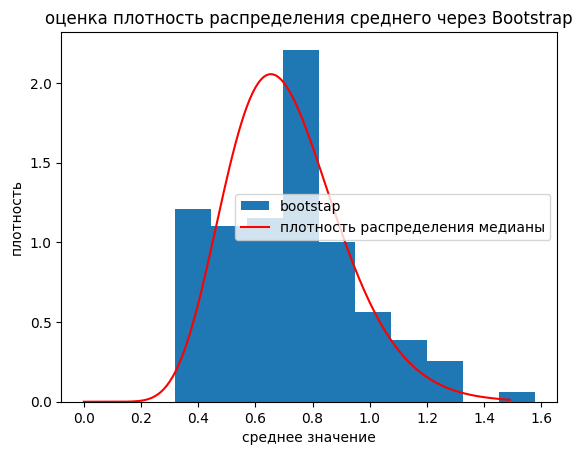

In [52]:
# e)

from scipy.special import comb

bootstrap = st.bootstrap((data, ), np.median, n_resamples=1000).bootstrap_distribution

x = np.arange(0, 1.5, 0.01)
distr_density = np.exp(-x)
distr_function = 1 - np.exp(-x)
n = data.size
k = 13
y = np.full_like(x, 0)
j = 0
for i in x:
    y[j] = n * distr_density[j] * comb(n - 1, k - 1) * (1 - distr_function[j]) ** (n - k) * distr_function[j] ** (k - 1)
    j += 1
fig, ax = plt.subplots()
ax.hist(bootstrap, density=True, label="bootstap")
ax.plot(x, y, label="плотность распределения медианы", color = "r")

ax.set_title('оценка плотность распределения среднего через Bootstrap')
ax.set_xlabel('среднее значение')
ax.set_ylabel('плотность')
ax.legend()